In [24]:
# Import pandas
import pandas as pd
# Import numpy
import numpy as np
# Import matplotlib
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sn
# Import stats
from scipy import stats
# Import ttest_ind
from scipy.stats import ttest_ind

In [25]:
# Reading the dataset
df = pd.read_csv("/Users/suleymanaygun/Desktop/untitled folder/train.csv", header= None)

In [26]:
# Set the max shown columns to unlimited
pd.set_option('display.max_columns', None)

In [27]:
# Calculate the percentage of missing values in each column of the df
null_percentage = df.isnull().sum() / len(df)

# Identify all the columns where the percentage of missing values is greater than 49%
null_cols = null_percentage[null_percentage > 0.49].index.tolist()

# Drop all the columns identified in the previous step from the df:
df = df.drop(null_cols, axis=1)

In [28]:
# Column & Row numbers
df.shape

(246008, 78)

In [29]:
# Calculate the percentage of missing values in each row of the df
null_percentage = df.isnull().sum(axis=1) / len(df.columns)

# Identify all the rows where the percentage of missing values is greater than 49%
null_rows = null_percentage[null_percentage > 0.49].index.tolist()

# Drop all the rows identified in the previous step from the df:
df = df.drop(null_rows, axis=0)

In [30]:
# Column & Row numbers
df.shape

(246008, 78)

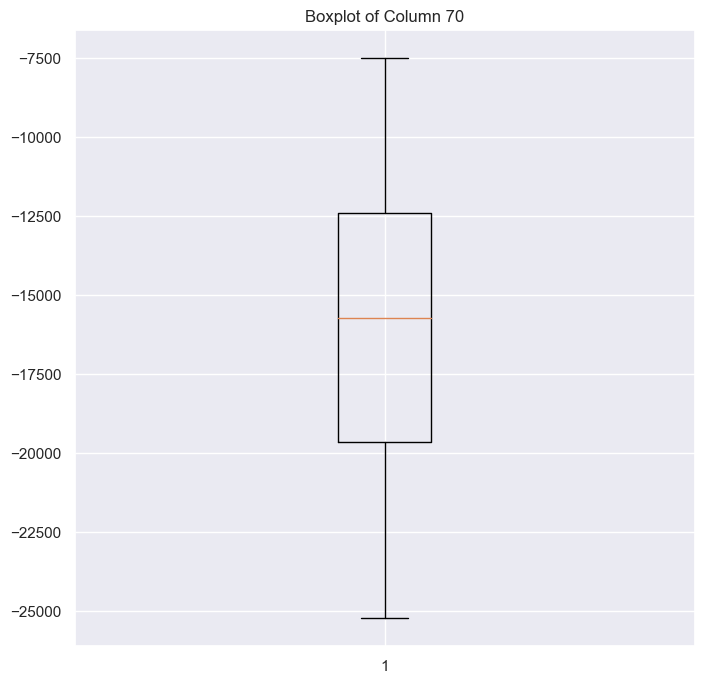

In [31]:
plt.figure(figsize=(8, 8))
plt.boxplot(df[70])

# set axis labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Boxplot of Column 70')

# show plot
plt.show()

In [32]:
z_threshold = 3
# Loop through each column
for column in df.columns:
    # Check if the column is numerical
    if pd.api.types.is_numeric_dtype(df[column]):
        # Calculate the z-score for each data point in the column
        z_scores = np.abs(stats.zscore(df[column]))
        # Replace outliers with null values
        df[column][z_scores > z_threshold] = np.nan

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_35391/1988420907.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][z_scores > z_threshold] = np.nan


In [33]:
# Distribution of types of data types in a column

df[45].value_counts()

0.0     172364
1.0      27052
2.0      11526
3.0       1340
4.0        391
5.0         58
6.0         21
7.0          6
8.0          5
19.0         1
Name: 45, dtype: int64

In [34]:
# Distribution percentages of types of data types in a column

df[45].value_counts(normalize=True)

0.0     0.810118
1.0     0.127146
2.0     0.054173
3.0     0.006298
4.0     0.001838
5.0     0.000273
6.0     0.000099
7.0     0.000028
8.0     0.000024
19.0    0.000005
Name: 45, dtype: float64

In [35]:
# Detect the null values for each column and distribute the null values to existing values according to their ratio:
for col_dist in df.columns:
    null_indices = df[col_dist].isnull()
    fill_values = df[col_dist].value_counts(normalize=True)
    df.loc[null_indices, col_dist] = np.random.choice(fill_values.index, size=null_indices.sum(), p=fill_values.values)

In [36]:
# Delete the row is there are more than 95% same value:
for col in df.columns:
    frequencies = df[col].value_counts()
    topfreq = frequencies.iloc[0]
    sum = len(df[col])
    similarity = topfreq / sum
    threshold = 0.95
    if similarity > threshold:
        df = df.drop(columns=[col])

In [37]:
# Column & Row numbers
df.shape

(246008, 47)

In [38]:
t_stat, p_value = ttest_ind(df[9], df[53])

if p_value > 0.85 or p_value < -0.85 :
    print("There is a significant difference in columns.")
else:
    print("There is no significant difference in columns.")

There is no significant difference in columns.


/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_35391/921085232.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_35391/921085232.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


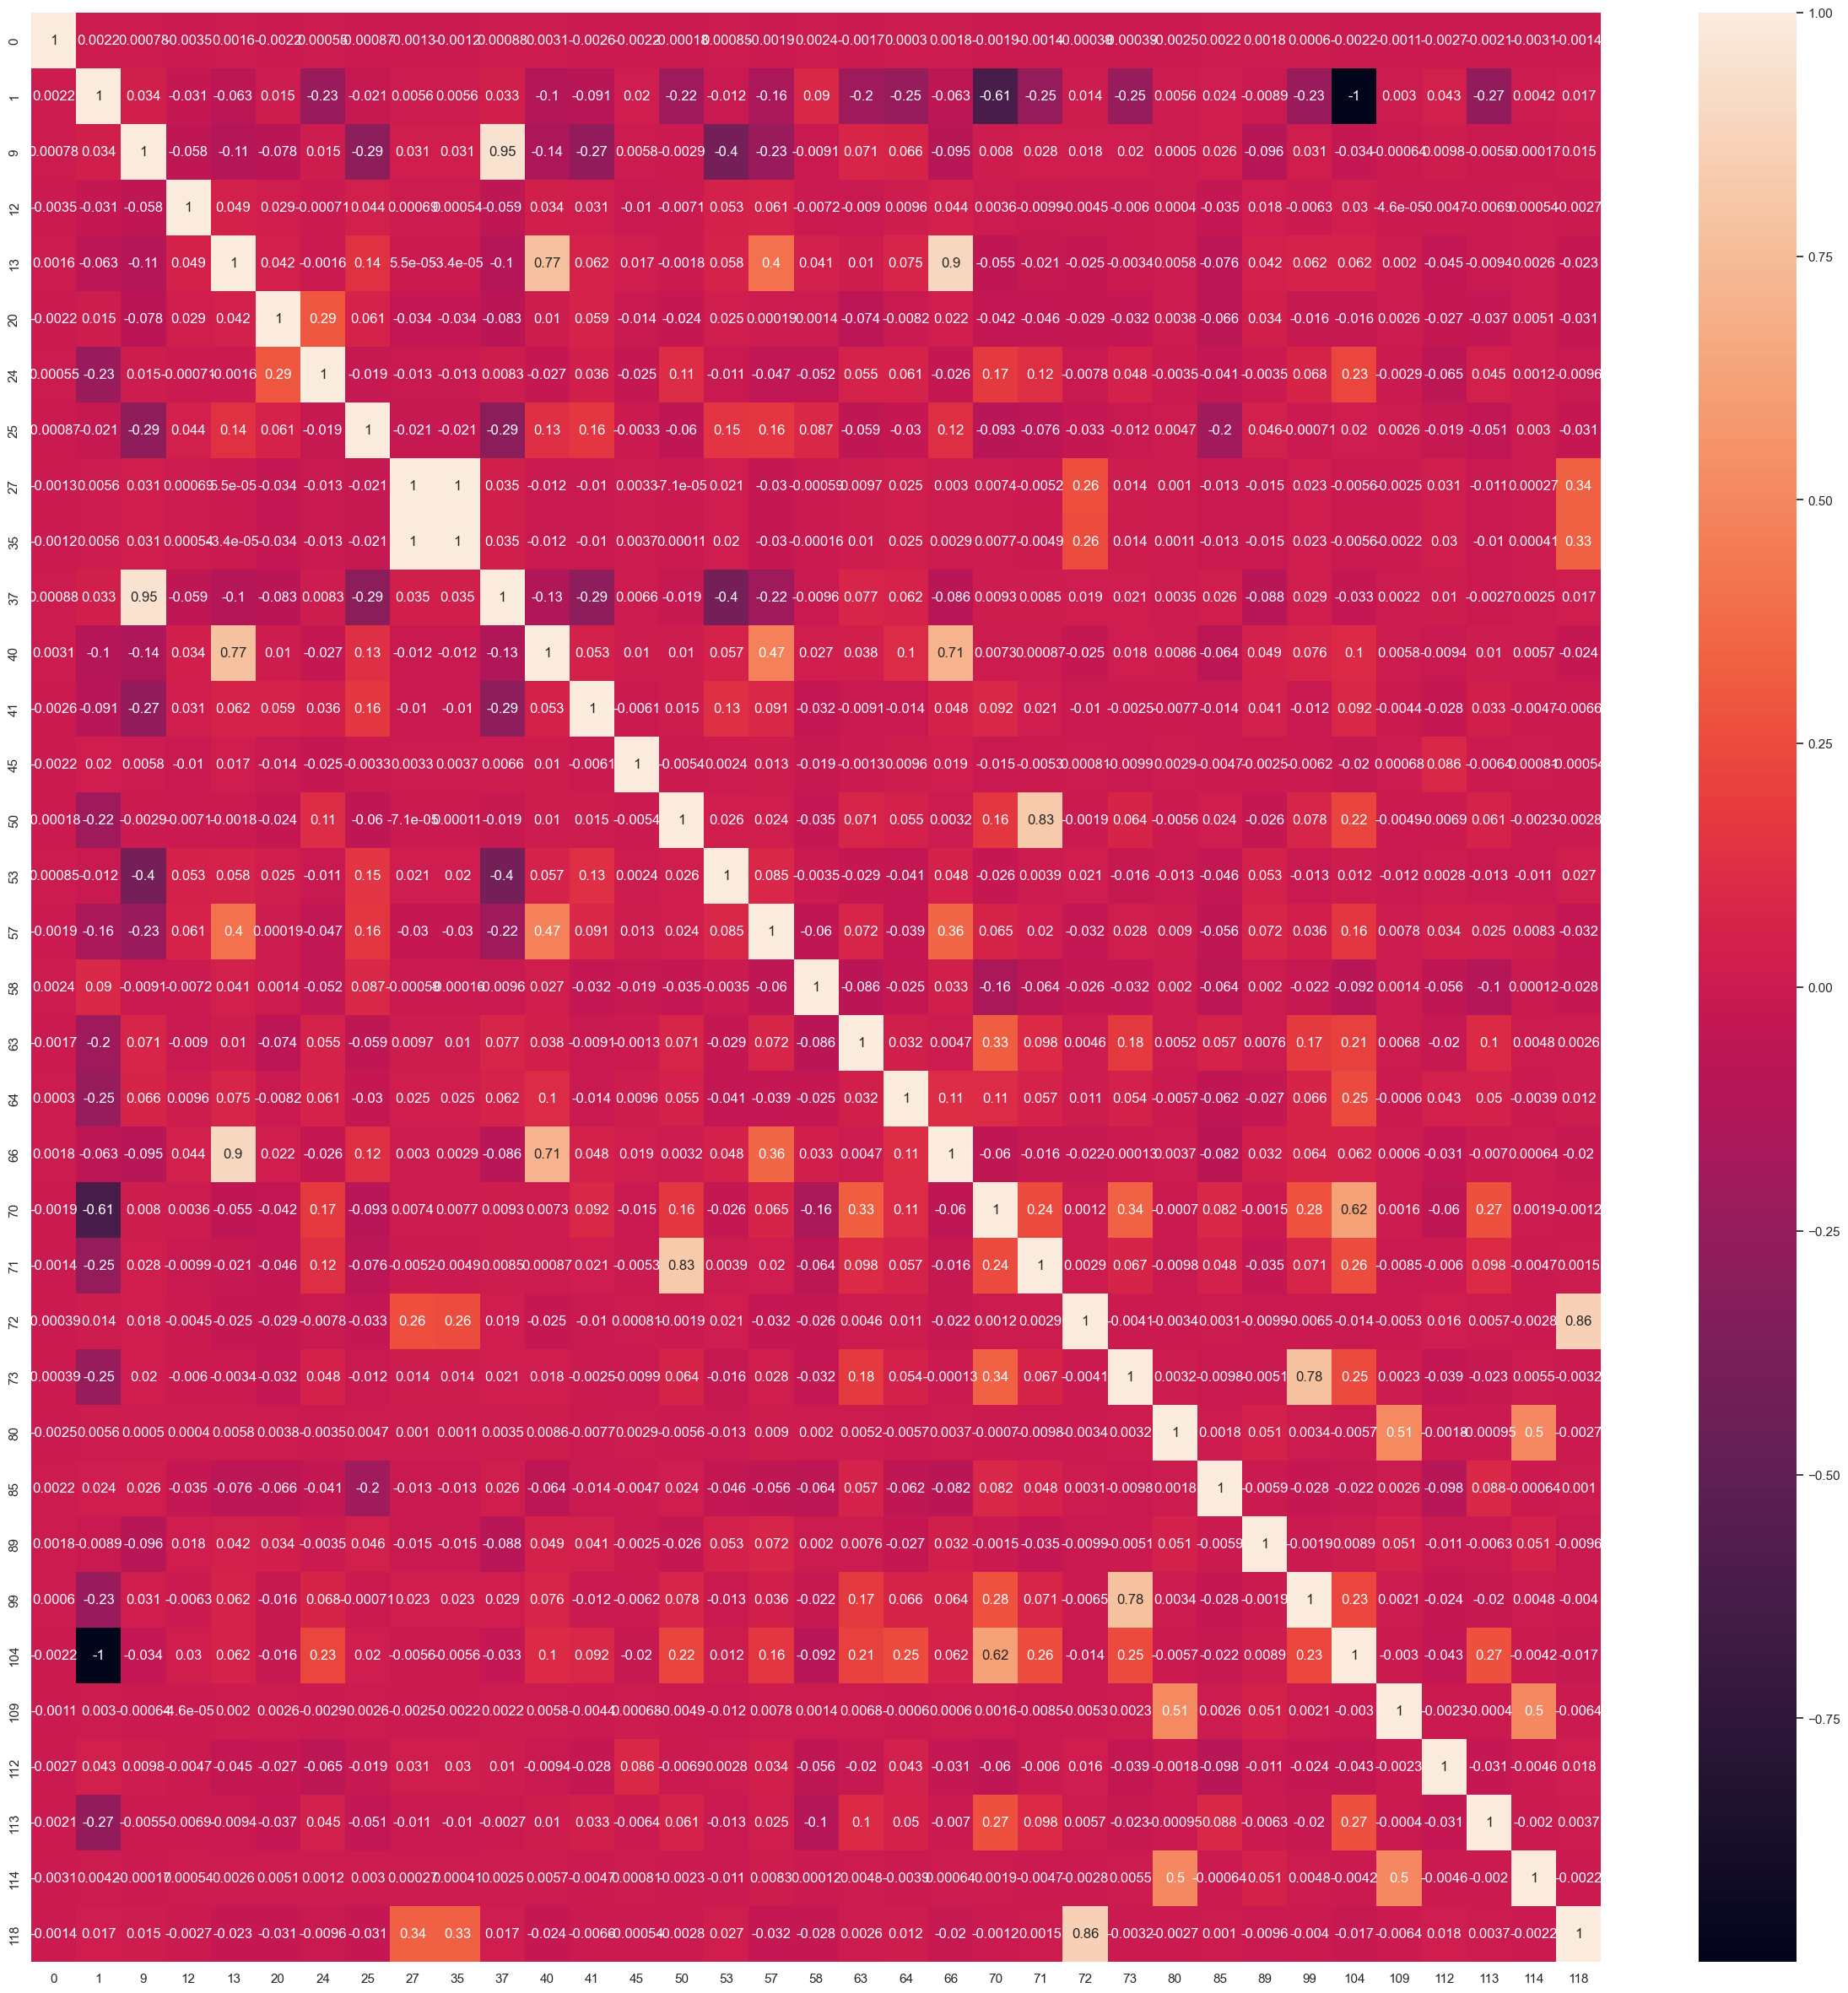

In [39]:
# Correlation Map

df.corr()
corr_matrix = df.corr()
sn.set (rc = {'figure.figsize':(30,30)})
sn.heatmap(corr_matrix, annot=True)
plt.show()

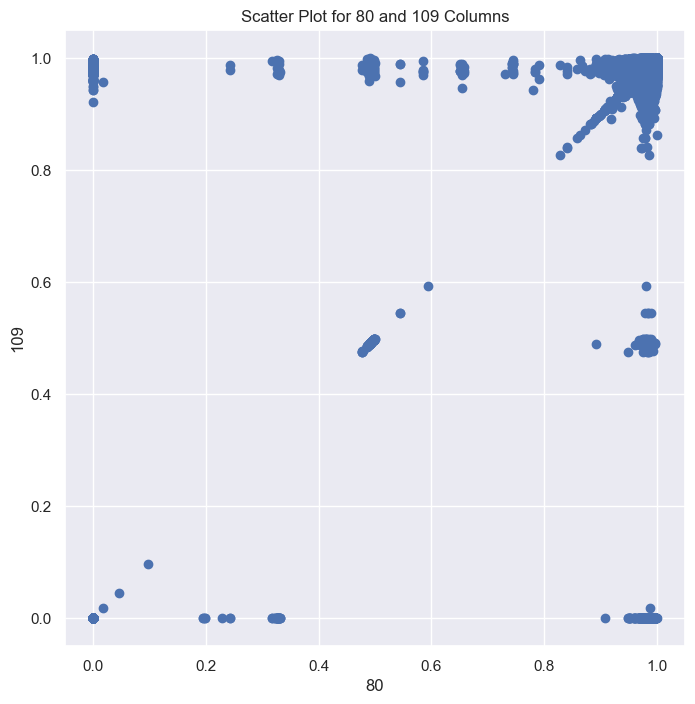

In [40]:
# To see the relationship between two column

fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(df[80], df[109])
plt.xlabel('80')
plt.ylabel('109')
plt.title('Scatter Plot for 80 and 109 Columns')
plt.show()

In [41]:
# Drop the columns that have higher similarity than 0.78:

df.drop(35, axis=1, inplace=True)
df.drop(37, axis=1, inplace=True)
df.drop(66, axis=1, inplace=True)
df.drop(71, axis=1, inplace=True)
df.drop(72, axis=1, inplace=True)
df.drop(99, axis=1, inplace=True)
df.drop(104, axis=1, inplace=True)
df.drop(118, axis=1, inplace=True)

In [42]:
df.shape

(246008, 39)

In [43]:
df.isna().sum()

0      0
1      0
5      0
6      0
9      0
12     0
13     0
16     0
20     0
24     0
25     0
27     0
30     0
31     0
40     0
41     0
44     0
45     0
47     0
50     0
53     0
57     0
58     0
63     0
64     0
67     0
69     0
70     0
73     0
80     0
85     0
89     0
93     0
103    0
109    0
112    0
113    0
114    0
117    0
dtype: int64

In [44]:
df.head(20)

,0,1,5,6,9,12,13,16,20,24,25,27,30,31,40,41,44,45,47,50,53,57,58,63,64,67,69,70,73,80,85,89,93,103,109,112,113,114,117
0,69769,-946,N,Bus2,2,0.0,180000.0,Unad,0,0,0.289573,0.0,Come,Hout,13189.5,10.0,Labs,1.0,N,0,0.008230,90000.0,0.622922,-6378.0,1,Hign,F,-12298,2.0,0.9851,0.0,0.2197,WEDY,Cass,0.9851,1.0,-4670,0.9851,Mard
1,236977,-92,Y,Othr,3,0.0,135000.0,Unad,0,0,0.514261,2.0,Come,Hout,13095.0,13.0,Dris,0.0,Y,1,0.003069,90000.0,0.819318,-1292.0,1,Secl,M,-15375,0.0,0.9871,-509.0,0.0432,TUEY,Cass,0.9717,0.0,-1994,0.9782,Mard
2,168821,-1646,N,Bus3,2,0.0,553500.0,Spor,1,0,0.486906,1.0,Worg,Hout,26307.0,5.0,Labs,0.0,Y,0,0.020713,135000.0,0.598926,-7951.0,1,Secl,M,-19307,0.0,0.9891,-1474.0,0.1269,TUEY,Cass,0.9891,2.0,-2842,0.9891,Sind
3,94708,-1651,N,Bus3,2,0.0,391500.0,Unad,1,0,0.675705,2.0,Come,Hout,34636.5,10.0,Labs,0.0,N,0,0.011703,135000.0,0.454321,-1033.0,1,Secl,M,-17791,0.0,0.9682,-2016.0,0.0065,TUEY,Cass,0.9682,4.0,-1345,0.9682,Sind
4,84556,-977,N,Rest,2,1.0,225000.0,Unad,0,0,0.154565,0.0,Come,Hout,27558.0,5.0,Accs,2.0,Y,0,0.006629,180000.0,0.220095,-2873.0,1,Incr,F,-8486,0.0,0.9732,-695.0,0.0864,MONY,Cass,0.9861,2.0,-852,0.9816,Sind
5,114510,365243,N,XNAA,2,3.0,225000.0,Unad,1,0,0.627827,5.0,Penr,Hout,11250.0,13.0,Coof,1.0,Y,0,0.031329,74250.0,0.643026,-10391.0,0,Hign,F,-22373,0.0,0.9861,-399.0,0.1338,THUY,Revs,0.9861,2.0,-4138,0.9861,Mard
6,237407,-2285,Y,Tra3,2,0.0,360000.0,Unad,0,0,0.641732,2.0,Worg,Hout,13842.0,15.0,Dris,0.0,N,0,0.019689,157500.0,0.263647,-756.0,1,Secl,M,-14763,1.0,0.9747,-429.0,0.0494,TUEY,Cass,0.9747,0.0,-4328,0.9747,Cive
7,250624,-1432,N,Seld,2,0.0,1179000.0,Unad,0,0,0.548786,0.0,Come,Hout,39609.0,16.0,Salf,0.0,Y,1,0.018634,202500.0,0.424130,-11130.0,1,Secl,F,-13257,1.0,0.9811,-136.0,0.0449,TUEY,Cass,0.9811,1.0,-4177,0.9767,Mard
8,135815,-1380,N,Othr,2,1.0,225000.0,Unad,1,1,0.639925,0.0,Come,Hout,10953.0,15.0,Salf,0.0,N,0,0.026392,81000.0,0.438281,-1478.0,1,Secl,F,-9940,1.0,0.9925,-648.0,0.1234,FRIY,Cass,0.9925,0.0,-2614,0.9926,Cive
9,109487,-140,Y,Agre,2,0.0,135000.0,Spor,0,0,0.328076,0.0,Come,Hout,6750.0,9.0,Higf,0.0,Y,1,0.025164,112500.0,0.638044,-1042.0,0,Secl,M,-21332,0.0,0.9682,-1236.0,0.0662,TUEY,Revs,0.9727,6.0,-4876,0.9876,Mard


In [45]:
# Replacing the strings into numbers
df[5] = df[5].replace({'Y': 1, 'N': 0})
df[16] = df[16].replace({'Unad': 0, 'Famy': 1,'Spor': 2,'Chin': 3,'OthB': 4,'OthA': 5,'Groe': 6})
df[30] = df[30].replace({'Worg': 0, 'Come': 1,'Penr': 2,'Stat': 3,'Uned': 4,'Stut': 5,'Busn': 6,'Mate': 7})
df[31] = df[31].replace({'Hout': 0, 'Wits': 1,'Munt': 2,'Rent': 3,'Offt': 4,'Co-t': 5})
df[47] = df[47].replace({'Y': 1, 'N': 0})
df[67] = df[67].replace({'Secl': 0, 'Hign': 1,'Incr': 2,'Lowy': 3,'Acae': 4})
df[69] = df[69].replace({'M': 1, 'F': 0, 'XNA': 0})
df[93] = df[93].replace({'MONY': 0, 'TUEY': 1,'WEDY': 2,'THUY': 3,'FRIY': 4,'SATY': 5,'SUNY': 6})
df[103] = df[103].replace({'Cass': 1, 'Revs': 0})
df[117] = df[117].replace({'Mard': 0, 'Sind': 1,'Cive': 2,'Sepd': 3,'Widw': 4,'Unkn': 5})

In [46]:
# Calculates the percentages. If values are between 0 and 1: float, if not: int
for column in df.columns:
 if df[column].dtype == 'int64' or df[column].dtype == 'float64':

    # count the number of values in the column that are between 0 and 1
    count = ((df[column] > 0) & (df[column] < 1)).sum()

    # if the majority of values are between 0 and 1, convert the column to float
    if count > len(df[column]) / 2:
        df[column] = df[column].astype(float)
    else:
        df[column] = df[column].astype(int)

In [47]:
df.dtypes

0        int64
1        int64
5        int64
6       object
9        int64
12       int64
13       int64
16       int64
20       int64
24       int64
25     float64
27       int64
30       int64
31       int64
40       int64
41       int64
44      object
45       int64
47       int64
50       int64
53     float64
57       int64
58     float64
63       int64
64       int64
67       int64
69       int64
70       int64
73       int64
80     float64
85       int64
89     float64
93       int64
103      int64
109    float64
112      int64
113      int64
114    float64
117      int64
dtype: object

In [48]:
# Decreasing the float numbers to 2 after the comma
df[[25, 53, 58, 89, 109]] = df[[25, 53, 58, 89, 109]].round(2)

In [49]:
df.head(20)

,0,1,5,6,9,12,13,16,20,24,25,27,30,31,40,41,44,45,47,50,53,57,58,63,64,67,69,70,73,80,85,89,93,103,109,112,113,114,117
0,69769,-946,0,Bus2,2,0,180000,0,0,0,0.29,0,1,0,13189,10,Labs,1,0,0,0.01,90000,0.62,-6378,1,1,0,-12298,2,0.9851,0,0.22,2,1,0.99,1,-4670,0.9851,0
1,236977,-92,1,Othr,3,0,135000,0,0,0,0.51,2,1,0,13095,13,Dris,0,1,1,0.00,90000,0.82,-1292,1,0,1,-15375,0,0.9871,-509,0.04,1,1,0.97,0,-1994,0.9782,0
2,168821,-1646,0,Bus3,2,0,553500,2,1,0,0.49,1,0,0,26307,5,Labs,0,1,0,0.02,135000,0.60,-7951,1,0,1,-19307,0,0.9891,-1474,0.13,1,1,0.99,2,-2842,0.9891,1
3,94708,-1651,0,Bus3,2,0,391500,0,1,0,0.68,2,1,0,34636,10,Labs,0,0,0,0.01,135000,0.45,-1033,1,0,1,-17791,0,0.9682,-2016,0.01,1,1,0.97,4,-1345,0.9682,1
4,84556,-977,0,Rest,2,1,225000,0,0,0,0.15,0,1,0,27558,5,Accs,2,1,0,0.01,180000,0.22,-2873,1,2,0,-8486,0,0.9732,-695,0.09,0,1,0.99,2,-852,0.9816,1
5,114510,365243,0,XNAA,2,3,225000,0,1,0,0.63,5,2,0,11250,13,Coof,1,1,0,0.03,74250,0.64,-10391,0,1,0,-22373,0,0.9861,-399,0.13,3,0,0.99,2,-4138,0.9861,0
6,237407,-2285,1,Tra3,2,0,360000,0,0,0,0.64,2,0,0,13842,15,Dris,0,0,0,0.02,157500,0.26,-756,1,0,1,-14763,1,0.9747,-429,0.05,1,1,0.97,0,-4328,0.9747,2
7,250624,-1432,0,Seld,2,0,1179000,0,0,0,0.55,0,1,0,39609,16,Salf,0,1,1,0.02,202500,0.42,-11130,1,0,0,-13257,1,0.9811,-136,0.04,1,1,0.98,1,-4177,0.9767,0
8,135815,-1380,0,Othr,2,1,225000,0,1,1,0.64,0,1,0,10953,15,Salf,0,0,0,0.03,81000,0.44,-1478,1,0,0,-9940,1,0.9925,-648,0.12,4,1,0.99,0,-2614,0.9926,2
9,109487,-140,1,Agre,2,0,135000,2,0,0,0.33,0,1,0,6750,9,Higf,0,1,1,0.03,112500,0.64,-1042,0,0,1,-21332,0,0.9682,-1236,0.07,1,0,0.97,6,-4876,0.9876,0


In [50]:
df.isna().sum()

0      0
1      0
5      0
6      0
9      0
12     0
13     0
16     0
20     0
24     0
25     0
27     0
30     0
31     0
40     0
41     0
44     0
45     0
47     0
50     0
53     0
57     0
58     0
63     0
64     0
67     0
69     0
70     0
73     0
80     0
85     0
89     0
93     0
103    0
109    0
112    0
113    0
114    0
117    0
dtype: int64

/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_35391/1451576425.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
/var/folders/xb/2hx2hy_92z91dc1d83mwdk2r0000gn/T/ipykernel_35391/1451576425.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


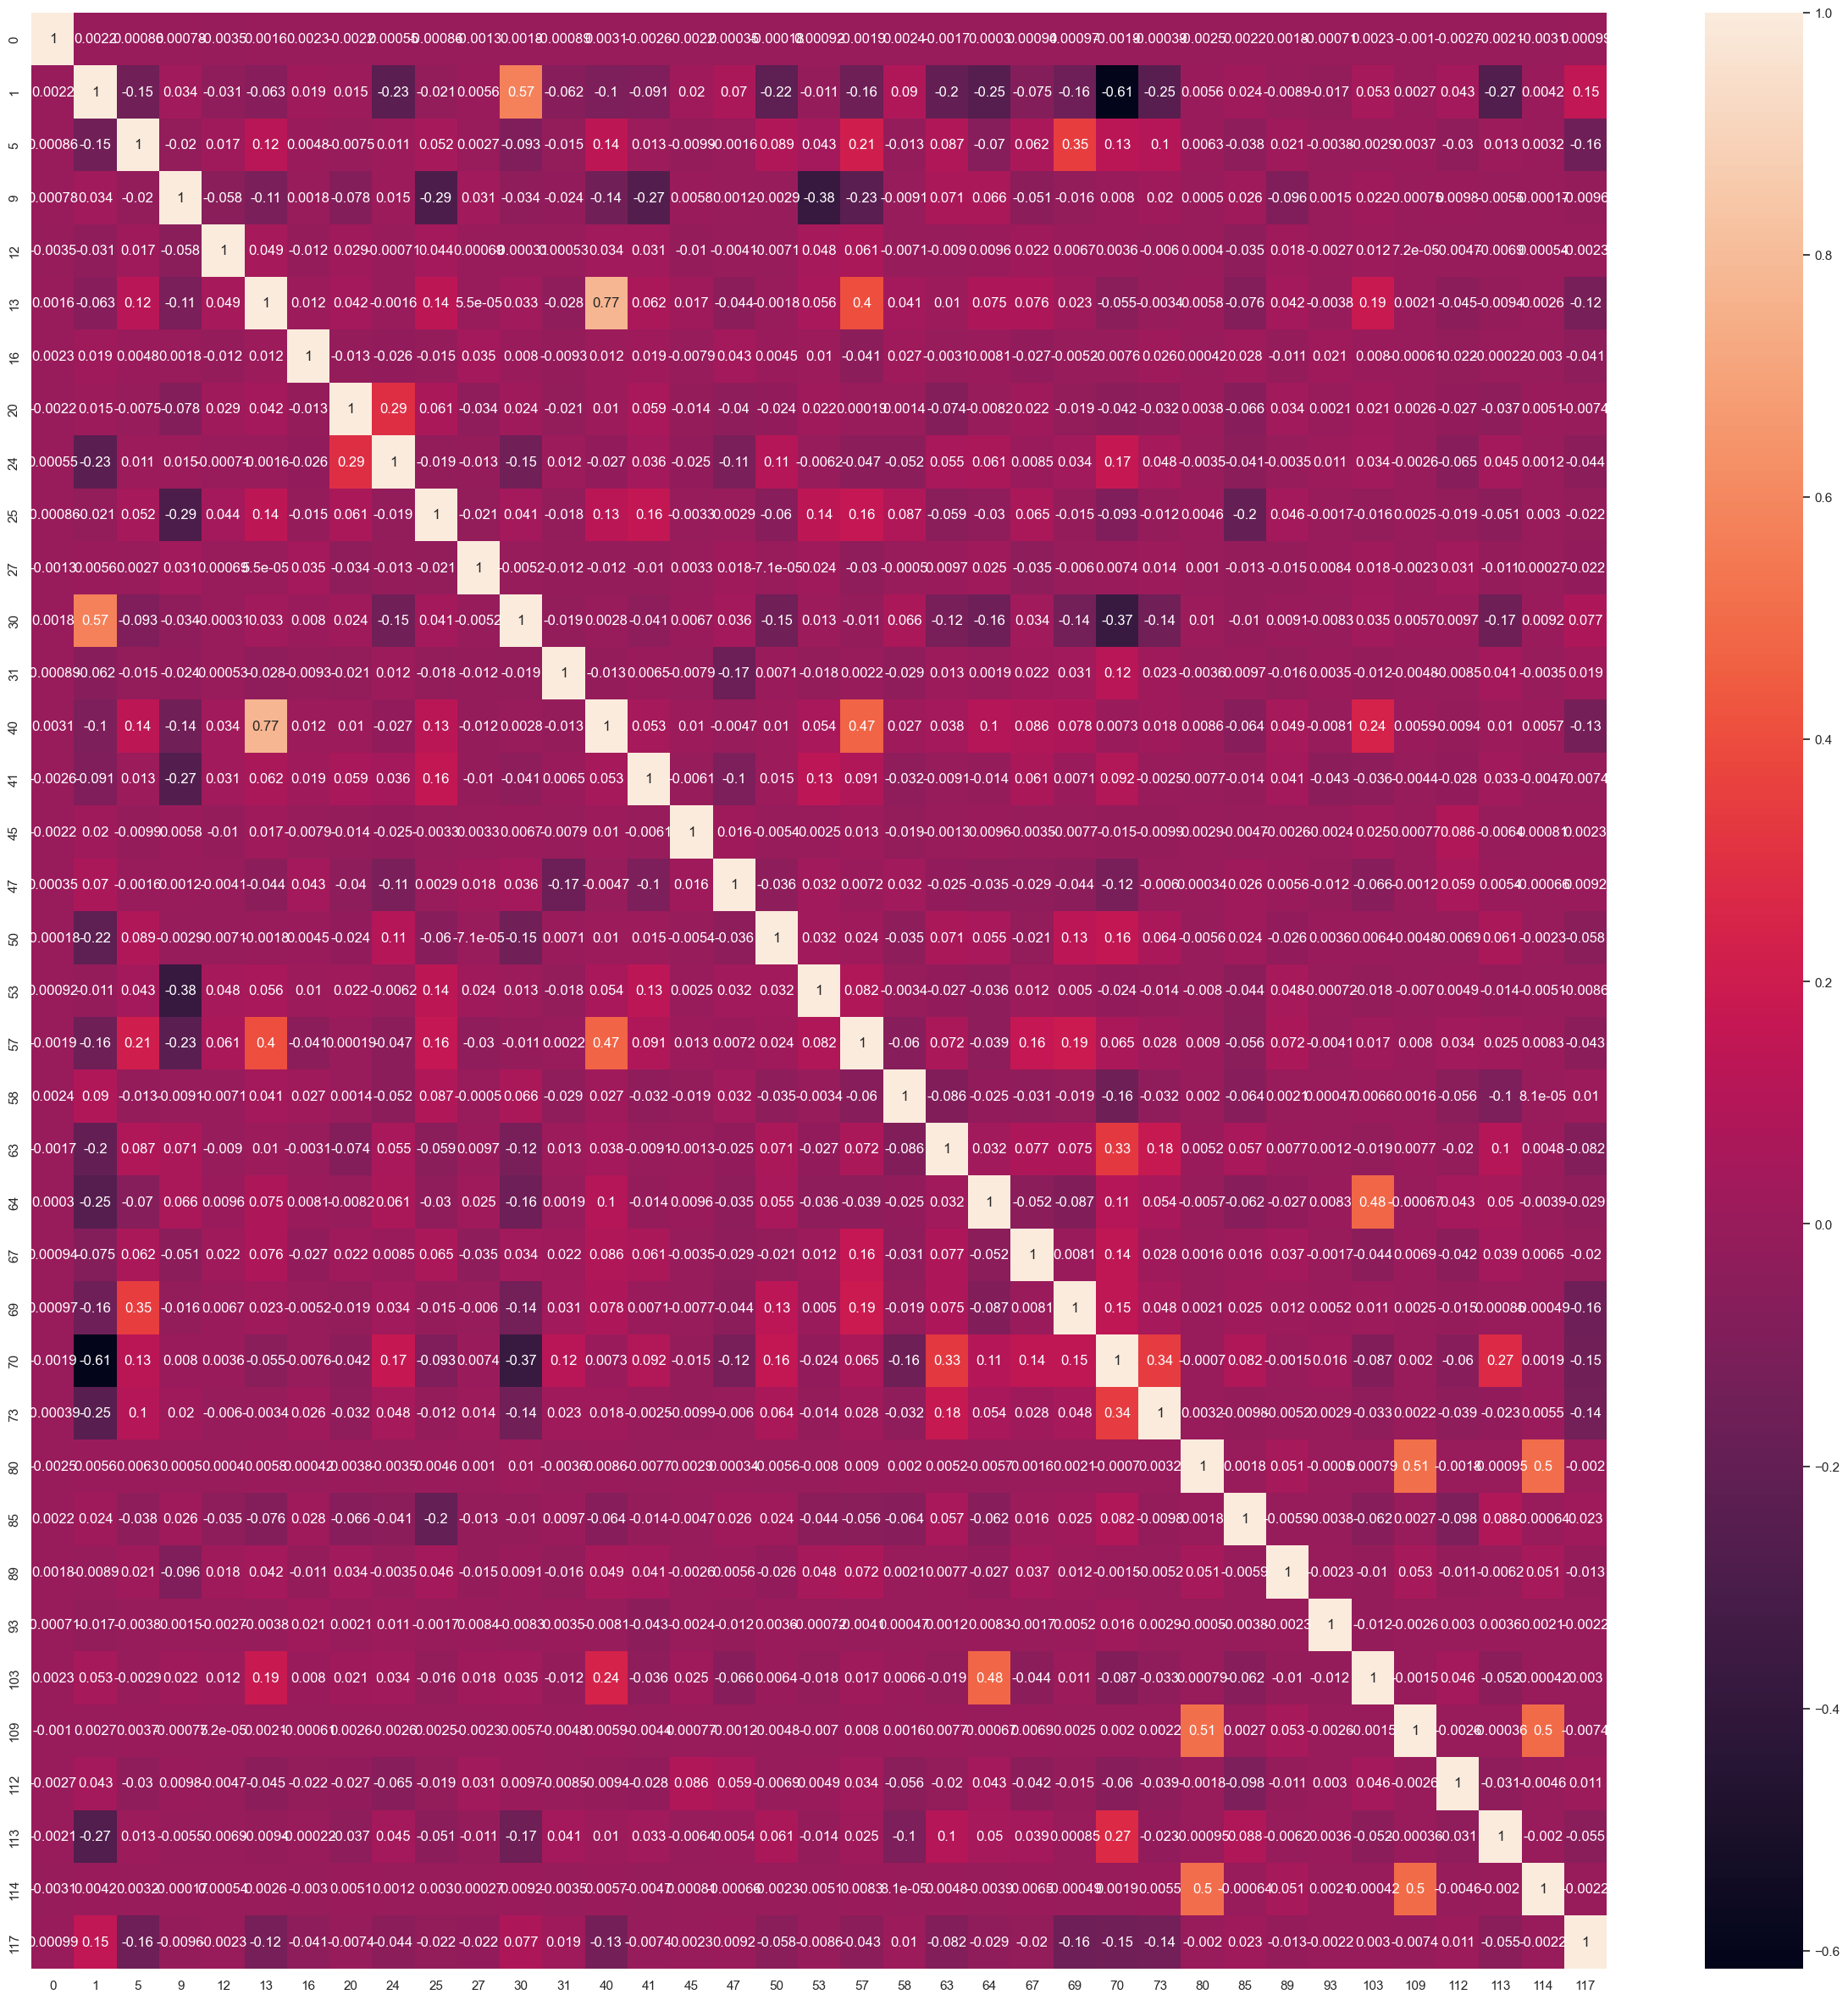

In [51]:
# Correlation Map

df.corr()
corr_matrix = df.corr()
sn.set (rc = {'figure.figsize':(30, 30)})
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [52]:
# Creating a new csv file with last version
df.to_csv('df.csv', index=False)

In [53]:
df.shape

(246008, 39)

In [54]:
df.isna().sum()

0      0
1      0
5      0
6      0
9      0
12     0
13     0
16     0
20     0
24     0
25     0
27     0
30     0
31     0
40     0
41     0
44     0
45     0
47     0
50     0
53     0
57     0
58     0
63     0
64     0
67     0
69     0
70     0
73     0
80     0
85     0
89     0
93     0
103    0
109    0
112    0
113    0
114    0
117    0
dtype: int64

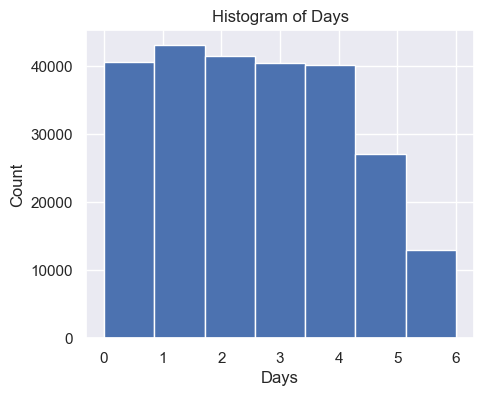

In [55]:
# Histogram of the column 93
# Because we wanted to look at days distribution since we understood that this column was day column
plt.figure(figsize=(5, 4))
plt.hist(df[93], bins=7)
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Histogram of Days')
plt.show()

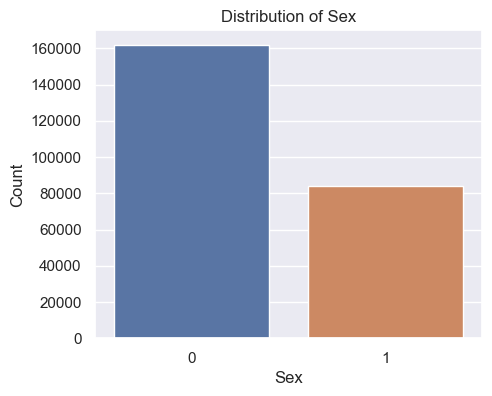

In [56]:
# Plot a bar chart of the 'Sex' column
plt.figure(figsize=(5, 4))
sn.countplot(x=69, data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()